# Discovering and Preparing The Dataset

In [1]:
import pandas as pd  #to read the dataframe
import time  #to measure time
import matplotlib.pyplot as plt #to plot figures 

In [2]:
df_with_description = pd.read_excel('Concrete_Data.xls')

In [3]:
#show the head of the dataframe
df_with_description.head()   

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
#rename the features 
df = df_with_description.copy()
df = df.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)' : 'X1'})
df = df.rename(columns = {'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'X2'})
df = df.rename(columns = {'Fly Ash (component 3)(kg in a m^3 mixture)' : 'X3'})
df = df.rename(columns = {'Water  (component 4)(kg in a m^3 mixture)' : 'X4'})
df = df.rename(columns = {'Superplasticizer (component 5)(kg in a m^3 mixture)': 'X5'})
df = df.rename(columns = {'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'X6'})
df = df.rename(columns = {'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'X7'})
df = df.rename(columns = {'Age (day)' : 'X8'})
df = df.rename(columns = {'Concrete compressive strength(MPa, megapascals) ' : 'Y'})

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
#show the number of null values in each column
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y     0
dtype: int64

In [6]:
#show the data size
print('dataset size =', df.size)

dataset size = 9270


In [7]:
#show the number of records
print('the number of records =', len(df))

the number of records = 1030


In [8]:
#show the number of features
print('the number of features =', len(df.columns)-1)

the number of features = 8


In [9]:
#prepare the features in a separate dataframe called xf
xf = df.drop(columns = ['Y'])
xf.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [10]:
#prepare the response variable in a separate column called yf
yf = df['Y']
yf.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Y, dtype: float64

In [11]:
#divide the dataset into training set (80%) and testing set (20%)
from sklearn.model_selection import train_test_split   #to divide the dataset 
X_train, X_test, y_train, y_test = train_test_split(xf, yf, test_size=0.2, random_state=1)

In [12]:
#to apply the cross validation 
from sklearn.model_selection import cross_val_score
#to apply the k division  
from sklearn.model_selection import KFold 

#cross validation model
Cross_Val_10 = KFold(n_splits=10, random_state=1, shuffle=True)

# Linear Regression

LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True n_jobs=None, positive=False)

link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



## importing the libraries and starting the implementation time

In [13]:
#to use linear regression model
from sklearn.linear_model import LinearRegression

#start the implementation time measuring
tic_st_imp_LR = time.perf_counter() 

## Choosing Parameters

As there is no parameters that affect the quality of the linear regression model, this step was skipped

## Linear Regression Final Model

In [14]:
Linear_Regression_Model = LinearRegression()

#start the fitting time measuring
tic_st_fit_LR = time.perf_counter()

Linear_Regression_Scores = cross_val_score(Linear_Regression_Model, X_train, y_train, cv=Cross_Val_10)

#end the fitting time measuring
tic_en_fit_LR = time.perf_counter()

#end the implementation time measuring
tic_en_imp_LR = time.perf_counter()

fitting_time_LR = tic_en_fit_LR - tic_st_fit_LR
implementation_time_LR = tic_en_imp_LR - tic_st_imp_LR
performance_LR =  Linear_Regression_Scores.mean()

print('Total implementation time of Linear Regression: ', implementation_time_LR)
print('Total fitting time of Linear Regression: ', fitting_time_LR)
print('Performance of Linear Regression: ', performance_LR)

Total implementation time of Linear Regression:  0.04700471099999959
Total fitting time of Linear Regression:  0.032883727999887924
Performance of Linear Regression:  0.6255430339646376


# K-Nearest Neighbors Regression

KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

link: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## importing the libraries and starting the implementation time

In [15]:
#to use random forest knn model
from sklearn import neighbors

#start the implementation time measuring
tic_st_imp_KNN = time.perf_counter() 

## Choosing Parameters

### **Choosing K**

In [16]:
K_Neighbors = []
K_Neighbors_time = []
K_Neighbors_Mean = []

for x in range(1, int(9*len(X_train)/10), 10):
  KNNx =neighbors.KNeighborsRegressor(n_neighbors = x, weights='uniform')
  st_speed_x = time.perf_counter()
  KNNx_Scores = cross_val_score(KNNx, X_train, y_train, cv=Cross_Val_10)
  en_speed_x = time.perf_counter()
  K_Neighbors.append(x)
  K_Neighbors_time.append(en_speed_x - st_speed_x)
  K_Neighbors_Mean.append(KNNx_Scores.mean())

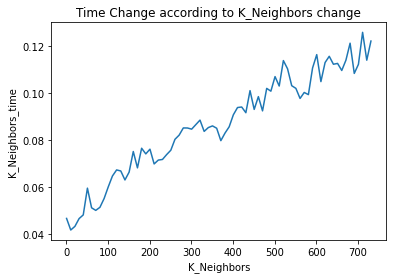

In [17]:
plt.plot(K_Neighbors, K_Neighbors_time)
plt.xlabel('K_Neighbors') 
plt.ylabel('K_Neighbors_time') 
plt.title('Time Change according to K_Neighbors change') 
plt.show()

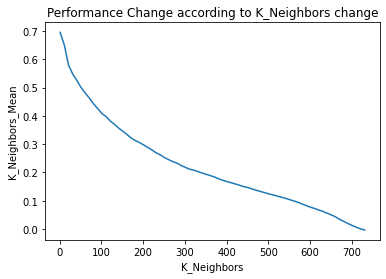

In [18]:
plt.plot(K_Neighbors, K_Neighbors_Mean)
plt.xlabel('K_Neighbors') 
plt.ylabel('K_Neighbors_Mean') 
plt.title('Performance Change according to K_Neighbors change')  
plt.show()

In [19]:
best_k_index = K_Neighbors_Mean.index(max(K_Neighbors_Mean))
best_k= K_Neighbors[best_k_index]
best_k_fitting_time = K_Neighbors_time[best_k_index]
best_k_performance = K_Neighbors_Mean[best_k_index]

print('best_k =', best_k)
print('with performance=', best_k_performance)
print('and time=', best_k_fitting_time)

best_k = 1
with performance= 0.694902556160428
and time= 0.04658441099991251


### **Choosing weight method**

In [20]:
KNN_uniform =neighbors.KNeighborsRegressor(n_neighbors = best_k, weights='uniform')
tic = time.perf_counter()
KNN_uniform_Scores = cross_val_score(KNN_uniform, X_train, y_train, cv=Cross_Val_10)
toc = time.perf_counter()
print('Total fitting time of KNN Regression with uniform weight: ',toc - tic)
print('Performance of KNN Regression with uniform weight: ', KNN_uniform_Scores.mean())

KNN_distance =neighbors.KNeighborsRegressor(n_neighbors = best_k, weights='distance')
tic = time.perf_counter()
KNN_distance_Scores = cross_val_score(KNN_distance, X_train, y_train, cv=Cross_Val_10)
toc = time.perf_counter()
print('Total fitting time of KNN Regression with distance weight: ',toc - tic)
print('Performance of KNN Regression with distance weight: ', KNN_distance_Scores.mean())

Total fitting time of KNN Regression with uniform weight:  0.11576422899997851
Performance of KNN Regression with uniform weight:  0.694902556160428
Total fitting time of KNN Regression with distance weight:  0.03859499899999719
Performance of KNN Regression with distance weight:  0.694902556160428


## Knn Final Model

In [21]:
Knn_Model = neighbors.KNeighborsRegressor(n_neighbors = best_k, weights='distance')

#start the fitting time measuring
tic_st_fit_KNN = time.perf_counter()

KNN_Regression_Scores = cross_val_score(Knn_Model, X_train, y_train, cv=Cross_Val_10)

#end the fitting time measuring
tic_en_fit_KNN = time.perf_counter()

#end the implementation time measuring
tic_en_imp_KNN = time.perf_counter()


fitting_time_KNN = tic_en_fit_KNN - tic_st_fit_KNN
implementation_time_KNN = tic_en_imp_KNN - tic_st_imp_KNN
performance_KNN =  KNN_Regression_Scores.mean()

print('Total implementation time of K-Nearest Neighbors Regression: ', implementation_time_KNN)
print('Total fitting time of K-Nearest Neighbors Regression: ', fitting_time_KNN)
print('Performance of K-Nearest Neighbors Regression: ', performance_KNN)


Total implementation time of K-Nearest Neighbors Regression:  7.001419120000037
Total fitting time of K-Nearest Neighbors Regression:  0.03838895900003081
Performance of K-Nearest Neighbors Regression:  0.694902556160428


# Random Forest Regression

RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

Link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

## importing the libraries and starting the implementation time

In [22]:
#to use random forest regression model
from sklearn.ensemble import RandomForestRegressor

#start the implementation time measuring
tic_st_imp_RF = time.perf_counter() 

## Choosing Parameters

### **N-estimators parameter**

Choosing the number of trees. In this section, we will try different number of n-estimators and compare between thier speed and performance 

In [23]:
N_est_time = []
N_est_Mean = []
N_est = []

for x in range(1, 15):
  RFx = RandomForestRegressor(n_estimators=x)
  st_speed_x = time.perf_counter()
  RFx_Scores = cross_val_score(RFx, X_train, y_train, cv=Cross_Val_10)
  en_speed_x = time.perf_counter()
  N_est.append(x)
  N_est_time.append(en_speed_x - st_speed_x)
  N_est_Mean.append(RFx_Scores.mean())

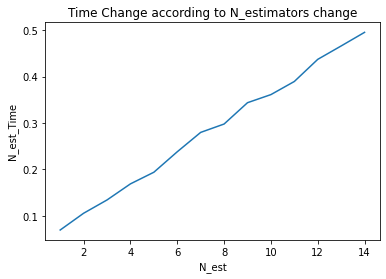

In [24]:
plt.plot(N_est, N_est_time)
plt.xlabel('N_est') 
plt.ylabel('N_est_Time') 
plt.title('Time Change according to N_estimators change') 
plt.show()

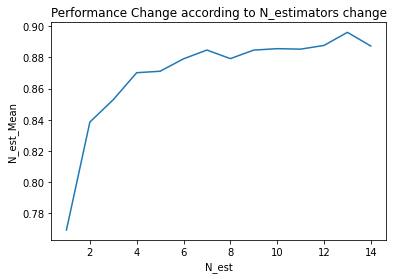

In [25]:
plt.plot(N_est, N_est_Mean)
plt.xlabel('N_est') 
plt.ylabel('N_est_Mean') 
plt.title('Performance Change according to N_estimators change')  
plt.show()

### **Error Criterion Parameter**

We have two criteria to apply, either (mae) Mean absolute error or (mse) Mean Squared error.  

In [26]:
Random_Forest_Model_mae = RandomForestRegressor(n_estimators=5, criterion='mae')
tic = time.perf_counter()
Random_Forest_Scores_mae = cross_val_score(Random_Forest_Model_mae, X_train, y_train, cv=Cross_Val_10)
toc = time.perf_counter()
print('Total fitting time of Random Forest Regression with mae: ',toc - tic)
print('Performance of Random Forest Regression with mae: ', Random_Forest_Scores_mae.mean())

Random_Forest_Model_mse = RandomForestRegressor(n_estimators=5, criterion='mse')
tic = time.perf_counter()
Random_Forest_Scores_mse = cross_val_score(Random_Forest_Model_mse, X_train, y_train, cv=Cross_Val_10)
toc = time.perf_counter()
print('Total fitting time of Random Forest Regression with mse: ',toc - tic)
print('Performance of Random Forest Regression with mse: ', Random_Forest_Scores_mse.mean())


Total fitting time of Random Forest Regression with mae:  1.0659582210000735
Performance of Random Forest Regression with mae:  0.8770616156973571
Total fitting time of Random Forest Regression with mse:  0.20166006099998413
Performance of Random Forest Regression with mse:  0.8693690060954833


## Random Forest Final Model

In [27]:
Random_Forest_Model = RandomForestRegressor(n_estimators=5, criterion='mse')

#start the fitting time measuring
tic_st_fit_RF = time.perf_counter()

Random_Forest_Regression_Scores = cross_val_score(Random_Forest_Model, X_train, y_train, cv=Cross_Val_10)

#end the fitting time measuring
tic_en_fit_RF = time.perf_counter()

#end the implementation time measuring
tic_en_imp_RF = time.perf_counter()

fitting_time_RF = tic_en_fit_RF - tic_st_fit_RF
implementation_time_RF = tic_en_imp_RF - tic_st_imp_RF
performance_RF =  Random_Forest_Regression_Scores.mean()

print('Total implementation time of Random Forest Regression: ', implementation_time_RF)
print('Total fitting time of Random Forest Regression: ', fitting_time_RF)
print('Performance of Random Forest Regression: ', performance_RF)



Total implementation time of Random Forest Regression:  5.780270588000121
Total fitting time of Random Forest Regression:  0.19903445999989344
Performance of Random Forest Regression:  0.8799989813093315


# Choosing Best Model

## Comparison between models

In [28]:
results = {'Models' : ['Linear Regression', 'Random Forest Regression', 'K-Nearest Neighbors Regression'],
           'implementation time' : [implementation_time_LR, implementation_time_RF, implementation_time_KNN],
           'fitting time' : [fitting_time_LR, fitting_time_RF, fitting_time_KNN],
           'performance' : [performance_LR, performance_RF, performance_KNN]}
results_df = pd.DataFrame(results, columns = ['Models', 'implementation time', 'fitting time', 'performance'])

results_df

,Models,implementation time,fitting time,performance
0,Linear Regression,0.047005,0.032884,0.625543
1,Random Forest Regression,5.780271,0.199034,0.879999
2,K-Nearest Neighbors Regression,7.001419,0.038389,0.694903


## Considering Linear Regression Model as the best model

In [29]:
from sklearn import metrics
Linear_Regression_Model.fit(X_test, y_test)
y_test_pred = Linear_Regression_Model.predict(X_test)
print('Test MSE: ', metrics.mean_squared_error(y_test, y_test_pred))

Test MSE:  113.79979243508389


## Considering K-Nearest Neighbors Regression Model as the best model

In [30]:
from sklearn import metrics
Knn_Model.fit(X_test, y_test)
y_test_pred = Knn_Model.predict(X_test)
print('Test MSE: ', metrics.mean_squared_error(y_test, y_test_pred))

Test MSE:  0.039606913656328235


## Considering Random Forest Model as the best model

In [31]:
from sklearn import metrics
Random_Forest_Model.fit(X_test, y_test)
y_test_pred = Random_Forest_Model.predict(X_test)
print('Test MSE: ', metrics.mean_squared_error(y_test, y_test_pred))

Test MSE:  20.09485087479116
